# <center> **CS 391, Spring 2021, Homework 4**
### <center> Due **Tuesday, February 23, 11:59 pm ET (Boston time)**, via Gradescope




###**Submission guidelines** 
Please write your solutions inside of this .ipynb file, then convert it to a PDF before submitting on Gradescope:

*   **In Jupyter:** File > Download as > PDF
*   **In Google Colab:** File > Print > Destination > Save as PDF

When you submit, please **be sure to match the answers on your PDF to the outline on Gradescope.** In other words, if the answer to problem 2.1 is on pages 2 and 3 of your PDF, please be sure to select those pages as the answer to problem 2.1 on Gradescope. Since it takes significantly longer to grade homework that is not properly matched, **we may deduct points** for noncompliant submissions.

The lab on Wednesday 1/27 covers how to get started with the notebooks for writing problem solutions and running experiments. In case you haven't done so, please sign up to the course Gradescope, with the access code **ERV7B2**: https://www.gradescope.com/courses/232562.

<div style="page-break-after: always;"></div>

### **1. Data Analysis**

**IMPORTANT:** This week, we will be using **NumPy arrays** instead of pandas DataFrames.  Please see this brief tutorial here if you would like a refresher on how to work with NumPy:  https://numpy.org/doc/stable/user/quickstart.html

This week, we will be looking at a USDA dataset detailing the nutritional value of 75 types of baby food produced in the US.  It contains the amounts of 47 different nutrients found in each sample:


In [77]:
import pandas as pd

pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

df = pd.read_csv('https://raw.githubusercontent.com/catabia/cs391_spring21/main/babyfood.csv')
# this line eliminates all rows with NaN values:
df = df.dropna()
df

,Shrt_Desc,Water,Energ,Protein,Lipid,Ash,Carbohydrt,Fiber,Sugar,Calcium,Iron,Magnesium,Phosphorus,Potassium,Sodium,Zinc,Copper,Manganese,Selenium,Vit,Thiamin,Riboflavin,Niacin,Panto,Vit.1,Folate,Folic,Food,Folate.1,Choline,Vit.2,Vit.3,Vit.4,Retinol,Alpha,Beta,Beta.1,Lycopene,Lut+Zea,Vit.5,Vit.6,Vit.7,Vit.8,FA,FA.1,FA.2,Cholestrl,GmWt
0,"BABYFOOD,JUC TREATS,FRUIT MEDLEY,TODD",12.89,347,0.00,0.02,0.29,86.68,0.00,57.40,12,0.24,7,9,54,89,0.03,0.04,0.06,1.90,8.00,0.01,0.01,0.06,0.05,0.01,1,0.00,1,1.00,9.10,0.00,2.00,0.00,0.00,0.00,1.00,0.00,0.00,2.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,28.00
1,"BABYFOOD,MEAT,BF,STR",82.44,81,12.03,2.52,0.57,2.43,0.00,0.00,5,0.98,11,93,187,41,2.22,0.15,0.04,2.90,2.10,0.01,0.14,2.50,0.08,0.04,8,0.00,8,8.00,37.60,1.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.37,0.40,15.00,0.60,1.18,0.95,0.16,51.00,14.70
2,"BABYFOOD,MEAT,BF,JR",82.44,81,12.03,2.52,0.57,2.43,0.00,0.00,5,0.98,11,93,187,41,2.22,0.15,0.04,2.90,2.10,0.01,0.14,2.50,0.08,0.04,8,0.00,8,8.00,37.60,1.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.37,0.40,15.00,0.60,1.18,0.95,0.16,51.00,28.35
3,"BABYFOOD,MEAT,VEAL,STR",82.37,81,13.12,2.45,0.54,1.51,0.00,0.00,6,0.76,11,98,170,39,2.50,0.15,0.04,3.50,0.00,0.02,0.12,2.85,0.15,0.05,5,0.00,5,5.00,49.50,1.65,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.28,0.70,26.00,0.00,1.06,1.05,0.16,33.00,16.00
7,"BABYFOOD,MEAT,LAMB,STR",81.06,87,14.07,3.41,0.60,0.85,0.00,0.00,7,1.19,13,104,193,43,2.43,0.15,0.04,2.20,1.20,0.02,0.17,2.91,0.11,0.04,0,0.00,0,0.00,54.70,1.90,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.19,0.10,4.00,0.60,1.65,1.27,0.31,36.00,22.00
12,"BABYFOOD,MEAT,TURKEY,STR",80.32,111,11.50,6.20,0.58,1.40,0.00,0.00,41,0.70,12,117,135,49,1.77,0.15,0.04,12.00,2.20,0.01,0.16,2.61,0.41,0.03,8,0.00,8,8.00,39.80,1.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08,0.80,34.00,0.00,1.64,2.38,1.74,58.00,15.00
13,"BABYFOOD,MEAT,TURKEY,JR",80.32,111,11.50,6.20,0.58,1.40,0.00,0.00,41,0.70,12,117,135,49,1.77,0.15,0.04,12.00,0.00,0.01,0.16,2.61,0.41,0.03,8,0.00,8,8.00,39.80,1.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08,0.80,34.00,0.00,1.64,2.38,1.74,58.00,19.00
14,"BABYFOOD,SNACK,GERBER GRADUATE FRUIT STRIPS,RE...",19.09,330,0.82,2.24,1.24,76.61,2.00,68.65,18,1.05,9,23,312,14,0.14,0.24,0.70,1.40,179.90,0.04,0.05,0.33,0.14,0.20,1,0.00,1,1.00,14.50,0.00,233.00,12.00,0.00,0.00,102.00,76.00,0.00,81.00,0.96,0.00,0.00,2.50,0.36,0.09,0.66,0.00,9.90
18,"BABYFOOD,H2O,BTLD,GERBER,WO/ ADDED FLUORIDE.",99.90,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,113.00
24,"BABYFOOD,DINNER,MACARONI&TOMATO&BF,STR",86.34,61,2.36,1.47,0.37,9.45,1.20,2.09,17,0.46,12,39,112,38,0.54,0.05,0.13,8.40,0.30,0.04,0.04,0.71,0.14,0.06,9,4.00,5,12.00,10.40,0.15,878.00,44.00,0.00,213.00,420.00,0.00,42.00,0.00,2.62,0.00,2.00,29.30,0.49,0.59,0.19,7.00,16.00


Here are the 47 columns of numerical data in this dataset converted to a NumPy array of floats named **babyfood** for your convenience.  You may wish to use the NumPy array for some answers, and the pandas DataFrame for others.  It's up to you!

In [78]:
import numpy as np
babyfood = np.array(df)
babyfood = babyfood[:,1:].astype(float)

# this line prints floats to the 3rd decimal place
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

babyfood.shape

(75, 47)

### **1.1**

Find the two features (columns) with greatest variance in the dataset.  Create a scatterplot with one of these features on the x-axis, and the other on the y-axis.  Do these features appear to be correlated with each other?

Text(0, 0.5, 'Data Matrix`s 2nd greatest variance feature')

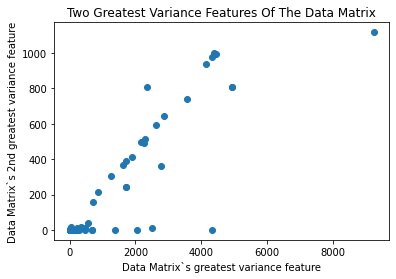

In [79]:
#Answer:
import matplotlib.pyplot as plt
babyfood_analyzed = babyfood.transpose()

greatest = [np.var(category) for category in babyfood_analyzed]

second = greatest.copy()
second.remove(max(greatest))

plt.plot(babyfood[:,greatest.index(max(greatest))], babyfood[:,second.index(max(second))], 'o')
plt.title("Two Greatest Variance Features Of The Data Matrix")
plt.xlabel("Data Matrix`s greatest variance feature")
plt.ylabel("Data Matrix`s 2nd greatest variance feature")


**Answer:** 
The features appear to be somewhat correlated to each other, we they (to a certain extent) form a linear graph over the dots' plot, which as we learn, as a direct relationship between the two columns in the provided data matrix.

## **1.2**

Normalize the numerical columns of data so that each value is between 0-1. For ease of notation, in the rest of this assignment we denote this normalized data matrix by $A$. Again, create a scatterplot of the two features with the greatest variance.  Are these the same features as in **2.1**?  Why or why not?  Also, do these features appear to be correlated?

[[0.129 0.727 0.000 ... 0.000 0.000 0.109]
 [0.825 0.170 0.842 ... 0.037 0.879 0.057]
 [0.825 0.170 0.842 ... 0.037 0.879 0.111]
 ...
 [0.140 0.721 0.380 ... 0.356 0.017 0.074]
 [0.803 0.193 0.213 ... 0.093 0.172 0.062]
 [0.024 0.820 0.875 ... 0.059 0.000 0.031]]


(75, 47)

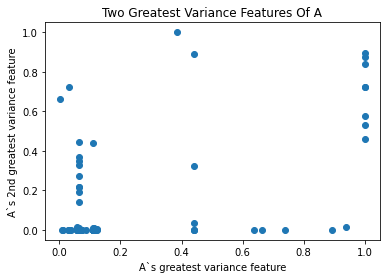

In [80]:
#Answer:
normalized=babyfood[:,:47].astype('float')

#normalize values to be between 0 and 1
A = normalized/normalized.max(axis=0)
print(A)

#print the normalized matrix's plot"
A_analyzed = A.transpose()

greatest = [np.var(category) for category in A_analyzed]

second = greatest.copy()
second.remove(max(greatest))

plt.plot(A[:,greatest.index(max(greatest))], A[:,second.index(max(second))], 'o')
plt.title("Two Greatest Variance Features Of A")
plt.xlabel("A`s greatest variance feature")
plt.ylabel("A`s 2nd greatest variance feature")
A.shape

**Answer:** Once you normalize the data, the two columns with the largest variance change.  This is because now all of the data values in each column are represented as a number between 0 and 1, so columns with particularly high whole-number measurements (such as Alpha, which has a max of 1,117) can be compared with columns that range accross smaller values.  Also, these two features do not appear to be at all correlated.

### **1.3**

We have denoted the normalized data matrix by $A$.  We will use the SVD decomposition $A= U\Sigma V^T$ to get a better understanding of the data.

What is the size of the matrices $U, \Sigma$ and $V$?  $A$ happens to be a full rank matrix, so you should be able to answer this question by simply knowing the rank and the size of $A$.






**Answer:**
Consider that we know the size of A (75 x 47), which allows us to conclude the following sizes:
first, we let a = A.rows(), and let b = A.columns()

U has a size of (a x a) = (75 x 75)

$\Sigma$ has a size of (a x b) = (75 x 47)

V has a size of $V^T$ which has the size of (b x b) = (47 x 47)

### **1.4**
Using SciPy or NumPy, compute the singular value decomposition of the normalized data matix $A$. Compute the singular values of $A$ and show them in a lineplot in decreasing order of magnitude. The X-axis should correspond to the column index, the Y-axis to the value of each singular value. 

In [81]:
# Answer:
from scipy.linalg import svd

U,S,VT = svd(A)

print(S.shape)
print(S)

(47,)
[10.586 6.552 3.953 3.377 3.047 2.608 2.224 2.135 1.933 1.786 1.706 1.431
 1.345 1.251 1.203 1.163 0.977 0.804 0.761 0.716 0.598 0.546 0.469 0.455
 0.383 0.338 0.306 0.283 0.246 0.212 0.167 0.136 0.109 0.104 0.102 0.075
 0.066 0.063 0.058 0.047 0.040 0.010 0.006 0.003 0.001 0.000 0.000]


Text(0, 0.5, 'Magnitude')

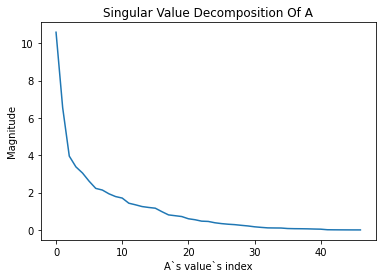

In [82]:
#plot the values above
plt.plot(np.arange(len(S)), S)

plt.title("Singular Value Decomposition Of A")
plt.xlabel("A`s value`s index")
plt.ylabel("Magnitude")

## **1.5**
We are looking for a low-rank approximation of the data. Looking at your plot do you think that k = 5, k = 20  or k= 40 would be a better choice to represent the main factors in the data?   Explain your thinking. 

**Answer:** 
We want to pick the lowest value from the three, k - 5, because picking a lower value for k (rank) will be a better pick, since it will allow us to constraint the approximation matrix to a much smaller scale, and thus to compare it to other matrices. We can also claim, that by looking at the graph from **1.4**, the value at k = 5 (column index) is more significant in value than k = 20 or =  40, and therefore selectong it as a rank approximation value would result in a much better distribution.

## **1.6**
Project your original normalized dataset into a space with the rank (a.k.a. dimension) you chose in **1.5**.  Then, create a scatterplot of the first two features of your projected data.  How are these features related to the features in your original dataset (a.k.a. water, protein, sugar, etc.)?

Text(0, 0.5, 'A`s 2nd greatest variance feature')

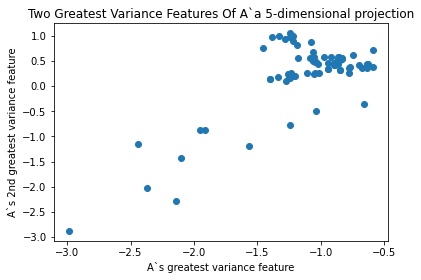

In [83]:
#Create the projection: 
V = VT.T
reduced_dimensions = V[:,:5]
projection = A.dot(reduced_dimensions)


plt.plot(projection[:,0], projection[:,1], 'o')
plt.title("Two Greatest Variance Features Of A`a 5-dimensional projection")
plt.xlabel("A`s greatest variance feature")
plt.ylabel("A`s 2nd greatest variance feature")

**Answer:** 
The first two columns (features) correspond to water and energy (in calories) respectively. THerefore, we learn lyrically that as the amount of water used is increasing, there is a great amount of energy (in calories) in the babyfood.

## **1.7**
There are 75 different types of baby food in our dataset, each represented by one row of $A$.  We can imagine each baby food is a "point" in a 47-dimensional space, where each of the dimensions is a column value. The following code computes the pairwise distances between each of the different baby foods and places it into a $75 \times 75$ NumPy array called $P$, where entry $p_{i,j}$ is the distance between the baby food on row $i$ and the baby food on row $j$.

In [84]:
P = np.zeros((A.shape[0], A.shape[0]))
print(A.shape)
for i in range(A.shape[0]):
    for j in range(A.shape[0]):
        diff = A[i,:] - A[j,:]
        P[i,j] = (diff.dot(diff))**0.5

P

(75, 47)


array([[0.000, 2.119, 2.119, ..., 1.929, 1.633, 1.489],
       [2.119, 0.000, 0.053, ..., 2.421, 1.195, 1.910],
       [2.119, 0.053, 0.000, ..., 2.421, 1.196, 1.912],
       ...,
       [1.929, 2.421, 2.421, ..., 0.000, 2.126, 1.847],
       [1.633, 1.195, 1.196, ..., 2.126, 0.000, 1.820],
       [1.489, 1.910, 1.912, ..., 1.847, 1.820, 0.000]])

Compute two similar distance metric matrices:

1. $Q$: distances when $A$ is projected into a $k=30$ dimensional space
2. $R$: distances when $A$ is projected into a $k=45$ dimensional space

Then, compute the difference between the original distances and the projected distances, aka $P-Q$ and $P-R$.  Does $A-Q$ have much larger values, does $P-R$ have much larger values, or are they about the same?  Why?

In [85]:
# Q = distance when A is projected into a k = 30 dimensional space
Q_projection = A.dot(VT.T[:,:30])
Q = np.zeros((Q_projection.shape[0], Q_projection.shape[0]))
print(A.shape)
for i in range(Q_projection.shape[0]):
    for j in range(Q_projection.shape[1]):
        diff = Q_projection[i,:] - Q_projection[j,:]
        Q[i,j] = (diff.dot(diff))**0.5
# R = distance when A is projected into a k = 45 dimensional space
R_projection = A.dot(VT.T[:,:45])
R = np.zeros((R_projection.shape[0], R_projection.shape[0]))
print(A.shape)
for i in range(R_projection.shape[0]):
    for j in range(R_projection.shape[1]):
        diff = R_projection[i,:] - R_projection[j,:]
        R[i,j] = (diff.dot(diff))**0.5
print("---------------")
print('Q Matrix: ' + str(Q) )
print('R Matrix: ' + str(R) )
print("---------------")

from scipy.linalg import norm
from numpy import linalg
a = linalg.norm(A)
p = linalg.norm(P)
q = linalg.norm(Q)
r = linalg.norm(R)
print('A = ' + str(a))
print('P = ' + str(p))
print('Q = ' + str(q))
print('R = ' + str(r))
print("Difference between P and Q is: " + str(p - q))
print("Difference between P and R is: " + str(p - r))
print("Difference between A and Q is: " + str(a - q))
print("Difference between A and R is: " + str(a - r))

(75, 47)
(75, 47)
---------------
Q Matrix: [[0.000 2.119 2.119 ... 0.000 0.000 0.000]
 [2.119 0.000 0.053 ... 0.000 0.000 0.000]
 [2.119 0.053 0.000 ... 0.000 0.000 0.000]
 ...
 [1.929 2.421 2.421 ... 0.000 0.000 0.000]
 [1.632 1.193 1.194 ... 0.000 0.000 0.000]
 [1.489 1.910 1.912 ... 0.000 0.000 0.000]]
R Matrix: [[0.000 2.119 2.119 ... 0.000 0.000 0.000]
 [2.119 0.000 0.053 ... 0.000 0.000 0.000]
 [2.119 0.053 0.000 ... 0.000 0.000 0.000]
 ...
 [1.929 2.421 2.421 ... 0.000 0.000 0.000]
 [1.633 1.195 1.196 ... 0.000 0.000 0.000]
 [1.489 1.910 1.912 ... 0.000 0.000 0.000]]
---------------
A = 15.168854032623008
P = 139.01924625938884
Q = 80.54065361749235
R = 104.5891642191455
Difference between P and Q is: 58.47859264189648
Difference between P and R is: 34.430082040243335
Difference between A and Q is: -65.37179958486935
Difference between A and R is: -89.4203101865225


**Answer:**
Note that P-R has much greter values than A-Q (though the difference is much larger between A-Q than P-R), because unlike A, the values in P are not normalized. Similarly, the values of Q are much smaller than in R because there is a smaller dimensional space taken into considertion, therefore decreasing the distance between all plotted values. Therefore, P-R has much greater values rather than A-Q. 